In [14]:
import medmnist
import numpy as np
from medmnist import PathMNIST

In [15]:
#download_directory = '/Users/*****/Desktop/AMLS_23_24_SN22241679/Datasets'

#dataset1 = PathMNIST(split="train", root=download_directory,download=True)
#dataset2 = PathMNIST(split="val", root=download_directory,download=True)
#dataset3 = PathMNIST(split="test",root=download_directory,download=True)

In [16]:
data=np.load('pathmnist.npz') # load the data

In [17]:
data.files

['train_images',
 'val_images',
 'test_images',
 'train_labels',
 'val_labels',
 'test_labels']

In [18]:
Image = data.files #save the data

#Put the data in each sets
x_train=np.array(data[Image[0]])
x_val=np.array(data[Image[1]])
x_test=np.array(data[Image[2]])

y_train=np.array(data[Image[3]])
y_val=np.array(data[Image[4]])
y_test=np.array(data[Image[5]])

In [19]:
print(x_train.shape) #check the shape to determine CNN input shape
print(x_val.shape)
print(x_test.shape)

(89996, 28, 28, 3)
(10004, 28, 28, 3)
(7180, 28, 28, 3)


In [20]:
#Combine the data together
x = np.concatenate((x_train, x_val, x_test), axis=0)
y = np.concatenate((y_train, y_val, y_test), axis=0)

In [21]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D
import platform
import pickle

In [22]:
#convert categorical data to multidimensional binary vectors
enc = OneHotEncoder() 
y=enc.fit_transform(y).toarray()

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15) #split the data with test size 15%

In [35]:
model=Sequential()

# Feature Learning Layers
model.add(Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=(28,28,3),padding='same'))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten()) #Prepare for classification

#Classification Layers
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(9,activation='softmax'))

#Check system os for optimisation in execution
if platform.system() == "Darwin" and platform.processor() == "arm":
    opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)
else:
    opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])
history = model.fit(x_train,y_train,batch_size=256, epochs=15, validation_split=0.1)


Epoch 1/15
321/321 [==============================] - 27s 83ms/step - loss: 1.2777 - categorical_accuracy: 0.5458 - val_loss: 0.9638 - val_categorical_accuracy: 0.6522
Epoch 2/15
321/321 [==============================] - 27s 83ms/step - loss: 0.8855 - categorical_accuracy: 0.6808 - val_loss: 0.8550 - val_categorical_accuracy: 0.6895
Epoch 3/15
321/321 [==============================] - 27s 85ms/step - loss: 0.7925 - categorical_accuracy: 0.7120 - val_loss: 0.7477 - val_categorical_accuracy: 0.7332
Epoch 4/15
321/321 [==============================] - 27s 84ms/step - loss: 0.7066 - categorical_accuracy: 0.7427 - val_loss: 0.7241 - val_categorical_accuracy: 0.7353
Epoch 5/15
321/321 [==============================] - 27s 84ms/step - loss: 0.6411 - categorical_accuracy: 0.7670 - val_loss: 0.6623 - val_categorical_accuracy: 0.7640
Epoch 6/15
321/321 [==============================] - 28s 86ms/step - loss: 0.5795 - categorical_accuracy: 0.7880 - val_loss: 0.5917 - val_categorical_accuracy:

In [36]:
model.evaluate(x_test,y_test)

503/503 [==============================] - 3s 6ms/step - loss: 0.4882 - categorical_accuracy: 0.8263


[0.48817241191864014, 0.8262735605239868]

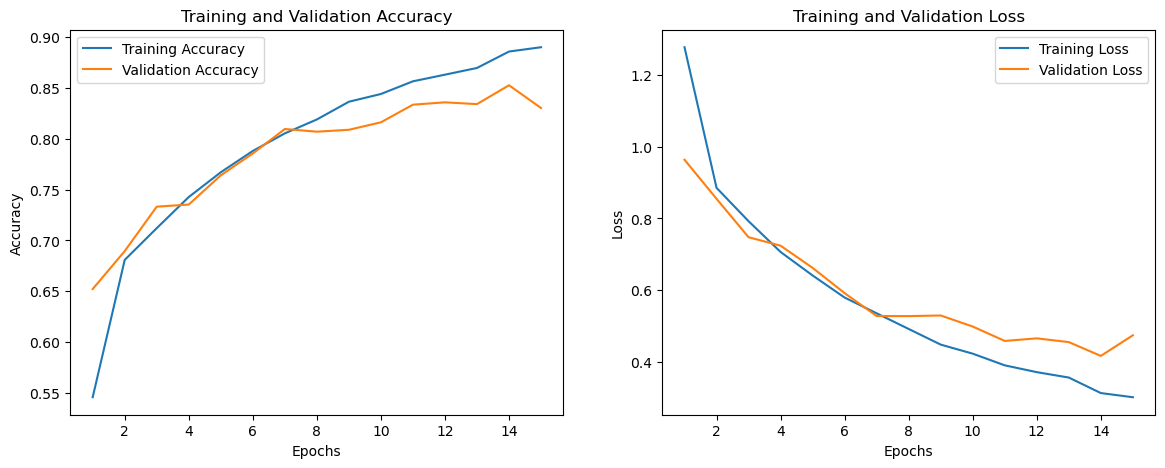

In [37]:
# Extracting the metrics from the history object
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, 16)  # Adjust the range based on the number of epochs

# Plotting the accuracy graph
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the loss graph
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [38]:
ypred=model.predict(x_test) #accuracy score

503/503 [==============================] - 3s 6ms/step


In [39]:
# save the multi classification model as a pickle file
model_pkl_file = "multi_classifier_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)